In [1]:
import numpy as np
import os
import pandas as pd

#Accuracy measurement
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle


#Visualaization
import seaborn as sns
import matplotlib.pyplot as plt


#Model Module
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten
from tensorflow.keras import backend as bk

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adamax
from tensorflow.keras.models import Sequential


from tqdm import tqdm
import cv2

In [2]:
classNames = ["cats", 'dogs']
catg = {classnames: i for i, classnames in enumerate(classNames)}

def imgdataset():
    path=['C:\\Users\\Shahriar\\Downloads\\dataset\\training_set','C:\\Users\\Shahriar\\Downloads\\dataset\\test_set']
    fullimgdata=[]
    for i in path:
        img=[]
        label=[]
        print("Counting : {}".format(i))
        for j in os.listdir(i):
            lb=catg[j]
            print(lb)
            for imgf in tqdm(os.listdir(os.path.join(i, j))):
                imagePath = os.path.join(os.path.join(i, j), imgf)
                
                imge=cv2.imread(imagePath)
                imge=cv2.cvtColor(imge, cv2.COLOR_BGR2RGB)
                imge=cv2.resize(imge, (128,128))
                img.append(imge)
                label.append(lb)
        img = np.array(img, dtype = "float32")
        label = np.array(label, dtype = 'float32')
        
        fullimgdata.append((img, label))
    return fullimgdata
        #print(imagePath)

In [3]:
(train_img,train_lbl),(test_img,test_lbl)=imgdataset()

Counting : C:\Users\Shahriar\Downloads\dataset\training_set
0


100%|██████████| 4000/4000 [00:17<00:00, 233.28it/s]


1


100%|██████████| 4000/4000 [00:18<00:00, 212.66it/s]


Counting : C:\Users\Shahriar\Downloads\dataset\test_set
0


100%|██████████| 1000/1000 [00:03<00:00, 313.98it/s]


1


100%|██████████| 1000/1000 [00:03<00:00, 283.75it/s]


In [4]:
shuf_train_img,train_lbl=shuffle(train_img,train_lbl,random_state = 26)

In [5]:
_,train_viz=np.unique(train_lbl,return_counts=True)
_,test_viz=np.unique(test_lbl,return_counts=True)

Text(0.5, 1.0, 'Image Labels Classification for Cats and Dogs Datasets')

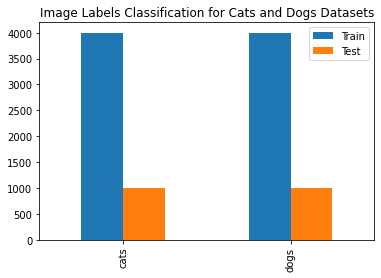

In [6]:
pd.DataFrame({"Train":train_viz,
            "Test": test_viz}, 
             index = catg
            ).plot.bar()
plt.title("Image Labels Classification for Cats and Dogs Datasets")

In [7]:
shuf_train_img=shuf_train_img/255.0
test_img=test_img/255.0

In [8]:
# Now Read an image after Scalling
def oneimg(classNames, imagePath, imagelabel):
    #Create an index for indivudual Image
    index = np.random.randint(imagePath.shape[0]) # Index always int
    
    plt.figure()# Define Frame size
    plt.imshow(imagePath[index])
    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()
    
    plt.title("Index of this Image is: {}".format(index) + " And Class is : "+ classNames[int(imagelabel[index])])
    plt.show()

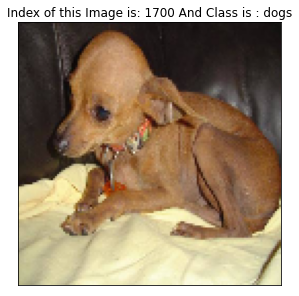

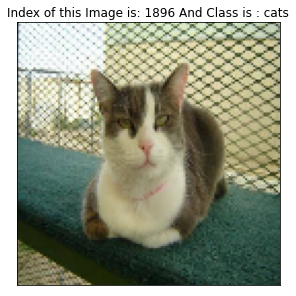

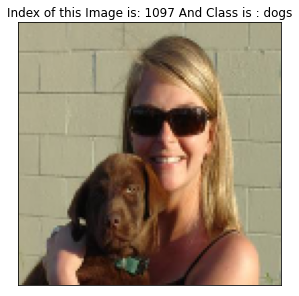

In [9]:
for i in range(1, 4):
    oneimg(classNames, shuf_train_img, train_lbl)

In [10]:
def ImageVisualization2(classNames, imagePath, imagelabel):
    
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Random Image Visualization", fontsize = 20 )
    
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.tight_layout()
        
        plt.imshow(imagePath[i], cmap = plt.cm.binary)
        plt.xlabel("Class Names: {}".format(classNames[int(imagelabel[i])]))
    plt.show()

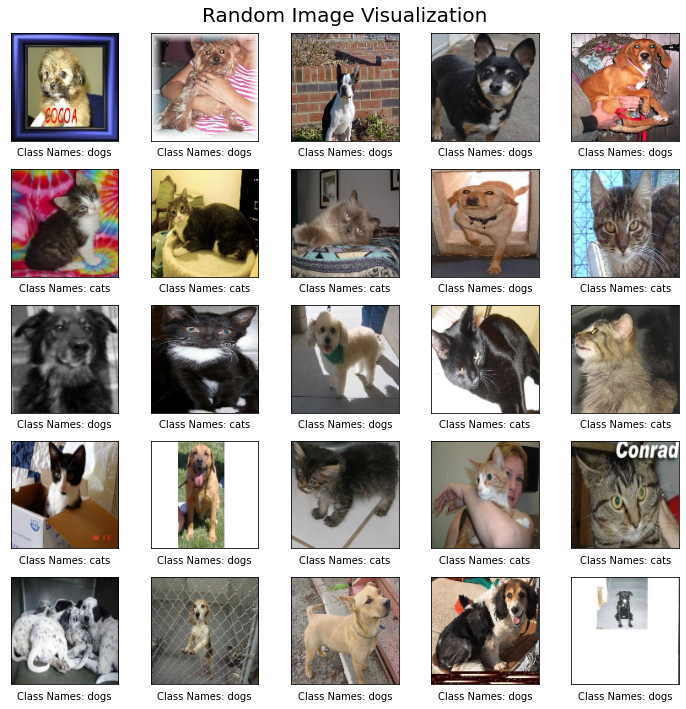

In [11]:
ImageVisualization2(classNames, shuf_train_img, train_lbl)

In [12]:
model = Sequential([
    
    # Input Layer
    
    Conv2D(32, (3, 3), activation = "relu", input_shape = (128, 128, 3)),
    MaxPooling2D(2, 2),
    
    #1st Hidden Layer

    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
     #2nd Hidden Layer
    
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    #3rd Hidden Layer
    
    Conv2D(256, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
    Flatten(),
    
    # Connected Layer
    
    Dense(256, activation = "relu"),
    Dense(2, activation = "softmax")
])

In [13]:
model.compile(optimizer = 'adam',
             loss = "sparse_categorical_crossentropy",
             metrics = ['accuracy'])

In [14]:
modelData = model.fit(shuf_train_img,
                     train_lbl,
                      epochs = 10,
                     batch_size = 128,
                     validation_split=0.2)

Epoch 1/10
50/50 [==============================] - 181s 4s/step - loss: 0.7050 - accuracy: 0.5106 - val_loss: 0.6769 - val_accuracy: 0.5594
Epoch 2/10
50/50 [==============================] - 202s 4s/step - loss: 0.6513 - accuracy: 0.6173 - val_loss: 0.6172 - val_accuracy: 0.6463
Epoch 3/10
50/50 [==============================] - 177s 4s/step - loss: 0.5841 - accuracy: 0.6931 - val_loss: 0.5782 - val_accuracy: 0.6850
Epoch 4/10
50/50 [==============================] - 165s 3s/step - loss: 0.5350 - accuracy: 0.7377 - val_loss: 0.5706 - val_accuracy: 0.6913
Epoch 5/10
50/50 [==============================] - 167s 3s/step - loss: 0.4893 - accuracy: 0.7677 - val_loss: 0.4888 - val_accuracy: 0.7650
Epoch 6/10
50/50 [==============================] - 170s 3s/step - loss: 0.4629 - accuracy: 0.7825 - val_loss: 0.5510 - val_accuracy: 0.7394
Epoch 7/10
50/50 [==============================] - 166s 3s/step - loss: 0.4178 - accuracy: 0.8100 - val_loss: 0.5409 - val_accuracy: 0.7225
Epoch 8/10
50

In [15]:
def accuracy_and_loss_Plot(modelData):
    
    fig = plt.figure(figsize = (10, 10))
    
    plt.subplot(221)
    plt.plot(modelData.history["accuracy"], 'bo--', label = 'accuracy')
    plt.plot(modelData.history["val_accuracy"], 'ro--', label = 'val_accuracy')
    plt.title("Training Data Accuracy Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
    
    plt.subplot(222)
    plt.plot(modelData.history["loss"], 'bo--', label = 'loss')
    plt.plot(modelData.history["val_loss"], 'ro--', label = 'val_loss')
    plt.title("Training Data Loss Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()

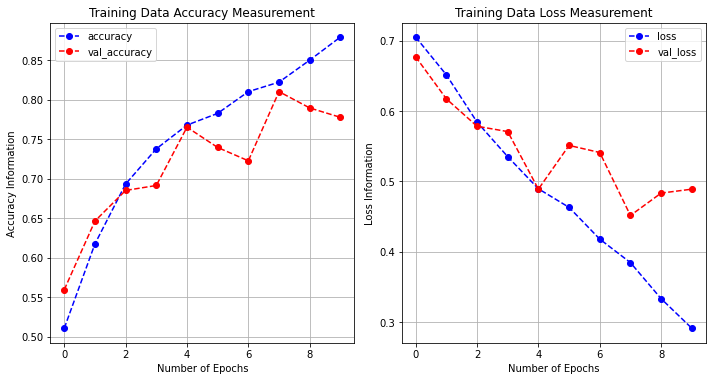

In [16]:
accuracy_and_loss_Plot(modelData)

In [17]:
testLoss = model.evaluate(test_img, test_lbl)

63/63 [==============================] - 14s 222ms/step - loss: 0.4638 - accuracy: 0.7955


63/63 [==============================] - 15s 237ms/step


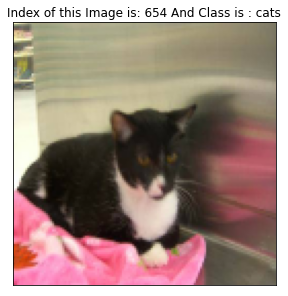

In [18]:
predictedData = model.predict(test_img)
predictedDataLabels = np.argmax(predictedData, axis = 1)
oneimg(classNames, test_img, predictedDataLabels)

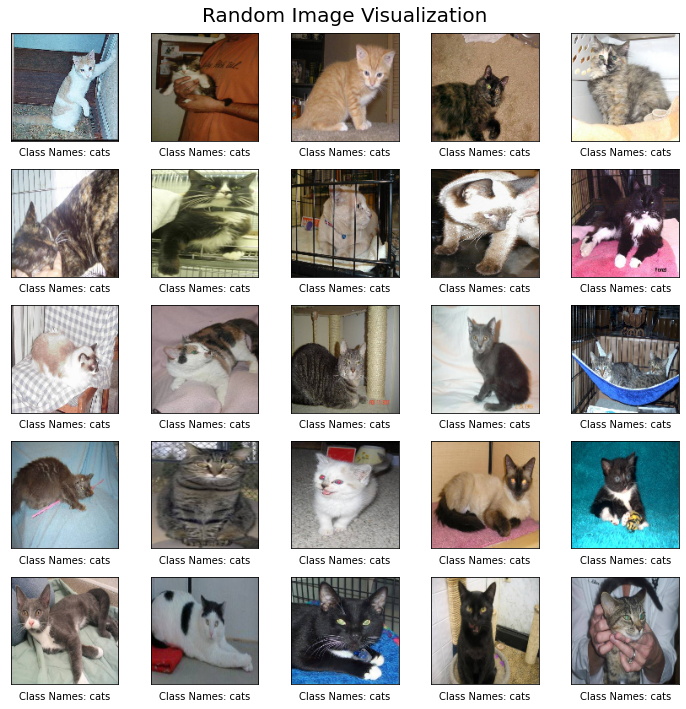

In [19]:
ImageVisualization2(classNames, test_img, test_lbl)

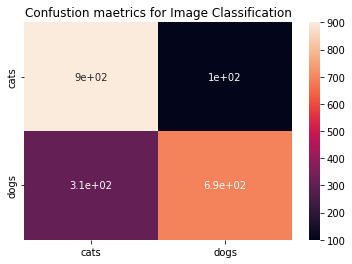

In [20]:
Cm = confusion_matrix(test_lbl, predictedDataLabels)
ax = plt.axes()
sns.heatmap(Cm, annot=True, 
           annot_kws={'size':10}, 
           xticklabels=classNames,
           yticklabels=classNames, 
           ax = ax)

plt.title("Confustion maetrics for Image Classification")
plt.show()